In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### National Survey on Drug Use and Health 2002 to 2014

https://www.icpsr.umich.edu/web/RCMD/search/studies?start=0&sort=score%20desc%2CTITLE_SORT%20asc&CLASSIF_FACET=RCMD.V.&ARCHIVE=RCMD&PUBLISH_STATUS=PUBLISHED&TIMEPERIOD_NEW=%5B2012%20TO%202022%5D&rows=50&q=Behavioral%20Risk%20Factor%20Surveillance%20System

In [2]:
drug = pd.read_stata('34933-0001-Data.dta', convert_categoricals=False) #2012 example

In [3]:
#contain race and sex column

In [4]:
drug.shape

(55268, 3120)

In [5]:
drug

,CASEID,QUESTID2,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,IIEMPSTY,II2EMSTY,EMPSTAT4,IIEMPST4,II2EMST4,PDEN00,COUTYP2,ANALWT_C,VESTR,VEREP
0,1,50886467,2,4,4,991,9991,91,91,91,...,1,1,99,9,9,2,2,1275.60,30054,2
1,2,13766883,2,99,99,991,9991,91,91,91,...,1,1,1,1,1,2,2,5191.07,30031,1
2,3,17772877,2,99,99,991,9991,91,91,91,...,1,1,1,1,1,3,3,419.74,30056,2
3,4,45622817,1,99,99,13,9999,99,2,93,...,1,1,2,1,1,2,2,1449.30,30054,1
4,5,17239390,1,99,99,11,9999,99,4,93,...,1,1,1,1,1,1,1,15344.29,30012,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55263,55264,54947473,2,99,99,991,9991,91,91,91,...,1,1,1,1,1,1,1,1289.36,30032,2
55264,55265,67706608,2,4,4,991,9991,91,91,91,...,9,9,99,9,9,2,1,116.92,30050,2
55265,55266,47284524,2,99,99,991,9991,91,91,91,...,1,1,2,1,1,1,1,1276.95,30018,1
55266,55267,32935928,1,99,99,13,9999,99,1,4,...,1,1,1,1,1,2,2,8072.38,30030,2


In [6]:
drug['ANLEVER'].value_counts()

91    46327
1      8674
98      195
81       71
97        1
Name: ANLEVER, dtype: int64

In [7]:
drug['WHODASC2']

0       -9
1        0
2        2
3        2
4        1
        ..
55263    5
55264   -9
55265    0
55266    1
55267    0
Name: WHODASC2, Length: 55268, dtype: int16

In [8]:
#correlation between WHODAS score and having ever used pain relievers nonmedically
np.corrcoef(drug['WHODASC2'],drug['ANLEVER'])

array([[ 1.        , -0.20258879],
       [-0.20258879,  1.        ]])

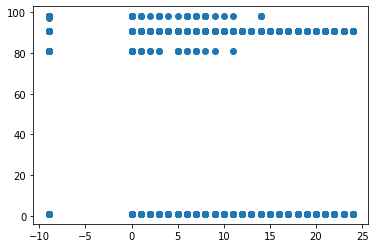

In [9]:
plt.scatter(drug['WHODASC2'],drug['ANLEVER'])

In [10]:
drug['MHSUIPLN'].value_counts()

 0    37041
-9    17559
 1      668
Name: MHSUIPLN, dtype: int64

In [11]:
#correlation between making a suicide plan and attempted suicide
np.corrcoef(drug['MHSUIPLN'], drug['MHSUITRY'])

array([[1.       , 0.9994002],
       [0.9994002, 1.       ]])

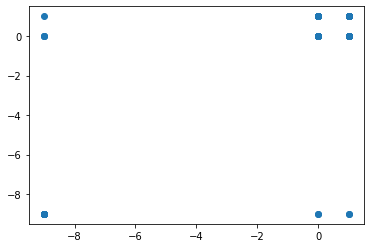

In [12]:
plt.scatter(drug['MHSUIPLN'], drug['MHSUITRY'])

In [13]:
#correlation between not receiving mental health treatment and using pain relievers (ABUSEANL), 
#tranquilizers (ABUSETRN), stimulants (ABUSESTM), or sedatives (ABUSESED) nonmedically
np.corrcoef(drug['AMHTXND2'], drug['ABUSEPSY'])

array([[ 1.        , -0.01081705],
       [-0.01081705,  1.        ]])

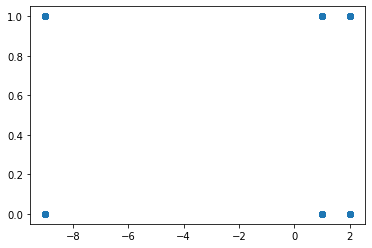

In [14]:
plt.scatter(drug['AMHTXND2'], drug['ABUSEPSY'])

In [15]:
np.corrcoef(drug['SNRLGIMP'], drug['AMHTXND2'])

array([[ 1.       , -0.9785895],
       [-0.9785895,  1.       ]])

In [16]:
relgion_df = drug[['SNRLGSVC','SNRLGIMP','SNRLDCSN','SNRLFRND']]
religion_df = relgion_df.rename({'SNRLGSVC':'Past_12_months','SNRLGIMP':'Important','SNRLDCSN':'Influence','SNRLFRND':'Friends_Share'},axis=1)
religion_df.shape

(55268, 4)

In [17]:
relgion_df

,SNRLGSVC,SNRLGIMP,SNRLDCSN,SNRLFRND
0,99,99,99,99
1,2,3,3,2
2,6,4,4,2
3,4,3,3,1
4,2,1,1,1
...,...,...,...,...
55263,1,3,3,3
55264,99,99,99,99
55265,1,97,97,97
55266,4,3,4,3


In [18]:
mental_health = drug[['AMHINP2', 'AMHOUTP3', 'MHLMNT3', 'MHLTHER3', 'MHLDOC3', 'MHLCLNC3', 
                     'MHLDTMT3', 'MHLSCHL3', 'MHLOTH3', 'MHPDSLF2', 'MHPDOFM2', 'MHPDPHI2', 
                     'MHPDMCR2', 'MHPDMCD2', 'MHPDREH2', 'MHPDEMP2', 'MHPDMIL2', 'MHPDPUB2', 
                     'MHPDPRV2', 'MHPDFRE2', 'AMHRX2', 'AMHTXRC3', 'AMHTXND2', 
                     'MHRCOST2', 'MHRNBRS2', 'MHRJOBS2', 'MHRNCOV2', 'MHRENUF2', 'MHRWHER2', 
                     'MHRCFID2', 'MHRCMIT2', 'MHRNOND2', 'MHRHAND2', 'MHRNOHP2', 'MHRTIME2', 
                     'MHRFOUT2', 'MHRTRAN2', 'MHRSOTH2', 'AUALTYR', 'AUALACUP', 'AUALCHIR', 
                     'AUALHERB', 'AUALSGRP', 'AUALINET', 'AUALRELG', 'AUALHLIN', 'AUALMASG', 
                     'AUALOTH', 'AUMOTVYR', 'DSTNRV30', 'DSTHOP30', 'DSTRST30', 'DSTCHR30', 
                     'DSTEFF30', 'DSTNGD30', 'DSTWORST', 'IMPREMEM', 'IMPCONCN', 'IMPGOUT', 
                     'IMPPEOP', 'IMPSOC', 'IMPHHLD', 'IMPRESP', 'IMPWORK', 'IMPWEEKS', 
                     'IMPDYFRQ', 'IMPYDAYS', 'IMPAIR', 'SUICTHNK', 'SPDMON', 'SPDYR', 'MHSUITHK',
                     'MHSUIPLN', 'MHSUITRY', 'WHODASC2', 'SMIPP_U', 'ADDPREV', 'AMDELT', 'AMDEYR',
                     'AMDETXRX', 'AHLTMDE', 'ASDSHOM2', 'ASDSWRK2', 'ASDSREL2', 'ASDSSOC2', 
                     'YTHER', 'YSPEC', 'YSHSW', 'ANYSMH', 'ANYMHED2', 'YMDELT', 'YMDEYR', 'YRXMDEYR',
                     'YRELMDE', 'YSDSHOME', 'YSDSWRK', 'YSDSREL', 'YSDSSOC', 'SNRLDCSN', 'YERLDCSN',
                     'RLGDCSN']]

mental_health

,AMHINP2,AMHOUTP3,MHLMNT3,MHLTHER3,MHLDOC3,MHLCLNC3,MHLDTMT3,MHLSCHL3,MHLOTH3,MHPDSLF2,...,YMDEYR,YRXMDEYR,YRELMDE,YSDSHOME,YSDSWRK,YSDSREL,YSDSSOC,SNRLDCSN,YERLDCSN,RLGDCSN
0,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,2,-9,-9,-9,-9,-9,-9,99,3,1
1,2,2,0,0,0,0,0,0,0,-9,...,-9,-9,-9,-9,-9,-9,-9,3,99,-9
2,2,2,0,0,0,0,0,0,0,-9,...,-9,-9,-9,-9,-9,-9,-9,4,99,-9
3,2,2,0,0,0,0,0,0,0,-9,...,-9,-9,-9,-9,-9,-9,-9,3,99,-9
4,2,2,0,0,0,0,0,0,0,-9,...,-9,-9,-9,-9,-9,-9,-9,1,99,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55263,2,2,0,0,0,0,0,0,0,-9,...,-9,-9,-9,-9,-9,-9,-9,3,99,-9
55264,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,0,0,-9,-9,-9,-9,99,4,1
55265,2,2,0,0,0,0,0,0,0,-9,...,-9,-9,-9,-9,-9,-9,-9,97,99,-9
55266,2,2,0,0,0,0,0,0,0,-9,...,-9,-9,-9,-9,-9,-9,-9,4,99,-9


In [20]:
mental_health = drug[['AUALRELG', 'AMHINP2', 'AMHOUTP3', 'AMHTXND2', 'AMHTXRC3', 
                      'SUICTHNK', 'SPDMON', 'SPDYR', 'MHSUITHK', 'MHSUIPLN', 'MHSUITRY', 
                     'WHODASC2', 'SMIPP_U', 'ADDPREV', 'AMDELT', 'AMDEYR']]

mental_health

,AUALRELG,AMHINP2,AMHOUTP3,AMHTXND2,AMHTXRC3,SUICTHNK,SPDMON,SPDYR,MHSUITHK,MHSUIPLN,MHSUITRY,WHODASC2,SMIPP_U,ADDPREV,AMDELT,AMDEYR
0,99,-9,-9,-9,-9,99,-9,-9,-9,-9,-9,-9,-9.000,99,-9,-9
1,99,2,2,2,2,2,0,0,0,0,0,0,0.009,2,2,2
2,99,2,2,2,2,2,0,0,0,0,0,2,0.005,1,2,2
3,99,2,2,2,2,2,0,0,0,0,0,2,0.005,2,2,2
4,99,2,2,2,2,2,0,0,0,0,0,1,0.009,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55263,99,2,2,2,2,2,0,0,0,0,0,5,0.008,1,2,2
55264,99,-9,-9,-9,-9,99,-9,-9,-9,-9,-9,-9,-9.000,99,-9,-9
55265,99,2,2,2,2,2,0,0,0,0,0,0,0.003,2,2,2
55266,99,2,2,2,2,2,0,0,0,0,0,1,0.009,1,1,2
